In [1]:
import pandas as pd

data = pd.read_csv('../datasets/rossmann.csv', skipinitialspace=True, low_memory=False)

In [3]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
data.loc[(data.Store == 1)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-30,1,4,5020,546,1,1,0,1,2015,7
2015-07-29,1,3,4782,523,1,1,0,1,2015,7
2015-07-28,1,2,5011,560,1,1,0,1,2015,7
2015-07-27,1,1,6102,612,1,1,0,1,2015,7


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Year'] = data.index.year
data['Month'] = data.index.month
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-31,2,5,6064,625,1,1,0,1,2015,7
2015-07-31,3,5,8314,821,1,1,0,1,2015,7
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7
2015-07-31,5,5,4822,559,1,1,0,1,2015,7


In [10]:
store1_data = data[data.Store == 1]
store1_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-30,1,4,5020,546,1,1,0,1,2015,7
2015-07-29,1,3,4782,523,1,1,0,1,2015,7
2015-07-28,1,2,5011,560,1,1,0,1,2015,7
2015-07-27,1,1,6102,612,1,1,0,1,2015,7


In [12]:
import seaborn as sb
%matplotlib inline

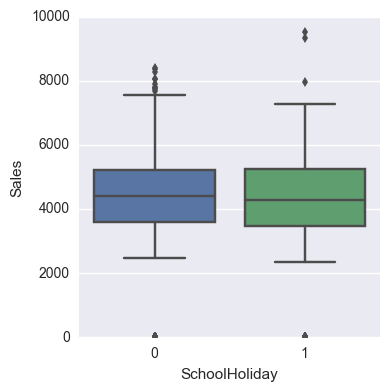

In [13]:
sb.factorplot(
    x='SchoolHoliday',
    y='Sales',
    data=store1_data, 
    kind='box'
)

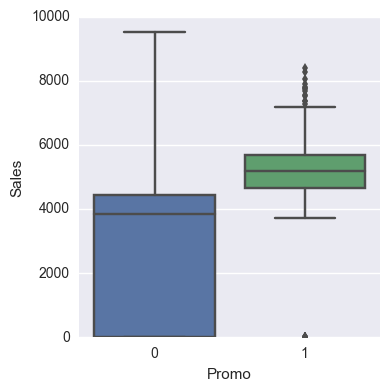

In [14]:
sb.factorplot(
    x='Promo',
    y='Sales',
    data=store1_data, 
    kind='box'
)

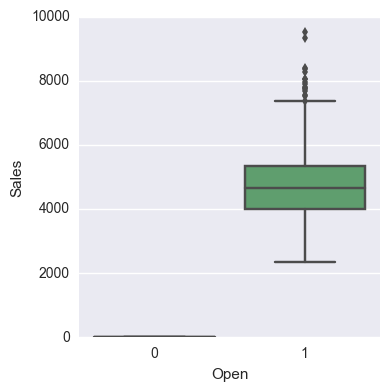

In [17]:
sb.factorplot(
    x='Open',
    y='Sales',
    data=store1_data, 
    kind='box'
)

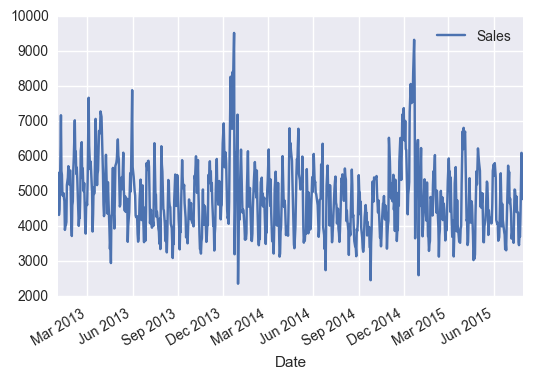

In [18]:
# Filter to days store 1 was open
store1_open_data = store1_data[store1_data.Open==1]
store1_open_data[['Sales']].plot()

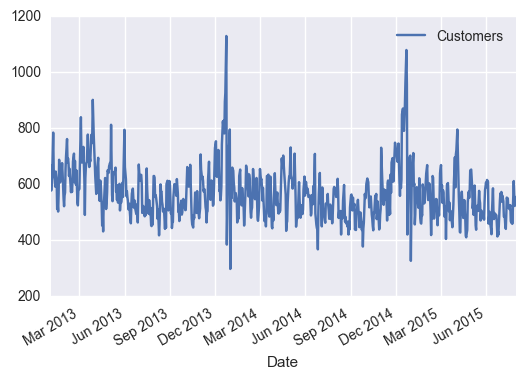

In [19]:
store1_open_data[['Customers']].plot()

In [22]:
data['Sales'].resample('D').mean().autocorr(lag=1)

-0.025858276006383588

In [23]:
data['Sales'].resample('D').mean().autocorr(lag=7)

0.55748935887396067

In [24]:
data['Customers'].resample('D').mean().autocorr(lag=1)

-0.095131583909775344

In [25]:
data['Customers'].resample('D').mean().autocorr(lag=7)

0.7027520358195597

In [26]:
import numpy as np

In [27]:
data[['Sales']].resample('M').apply([np.mean, np.median]).head()

Sales        
                   mean  median
Date                           
2013-01-31  5211.555578  5194.0
2013-02-28  5494.371397  5421.5
2013-03-31  5820.349168  5844.0
2013-04-30  5483.749836  5464.0
2013-05-31  5364.127383  5585.0

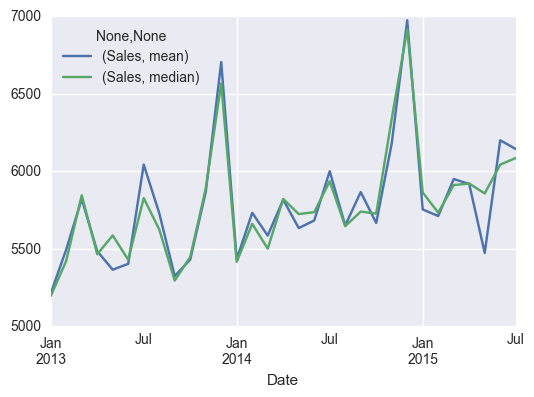

In [28]:
data[['Sales']].resample('M').apply([np.mean, np.median]).plot()

In [29]:
# Resample to have the daily average over all stores
daily_store_sales = data[['Sales']].resample('D').sum()

daily_store_sales.rolling(window=3, center=True).mean().head()

,Sales
Date,
2013-01-01,NaN
2013-01-02,4.464961e+06
2013-01-03,6.645534e+06
2013-01-04,6.312789e+06
2013-01-05,4.244817e+06


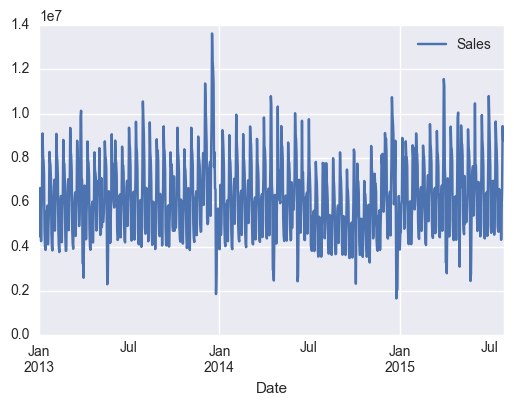

In [30]:
daily_store_sales.rolling(window=3, center=True).mean().plot()

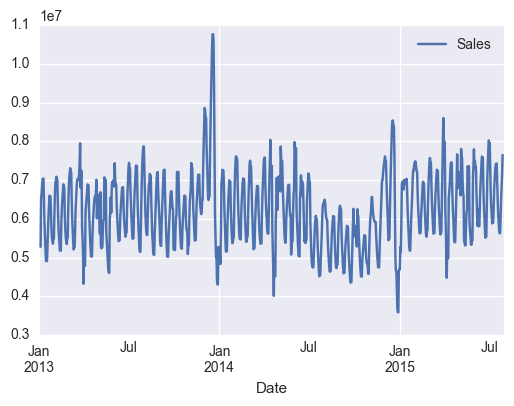

In [35]:
daily_store_sales.rolling(window=7, center=True).mean().plot()

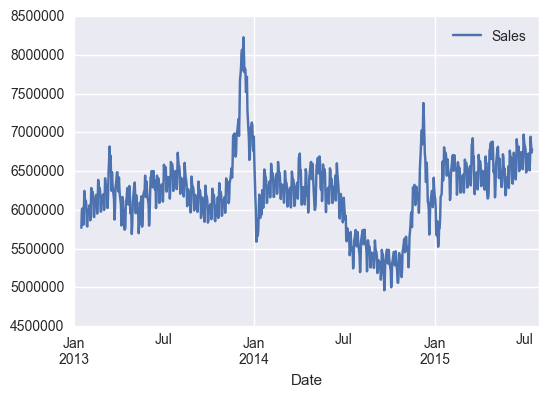

In [33]:
daily_store_sales.rolling(window=30, center=True).mean().plot()

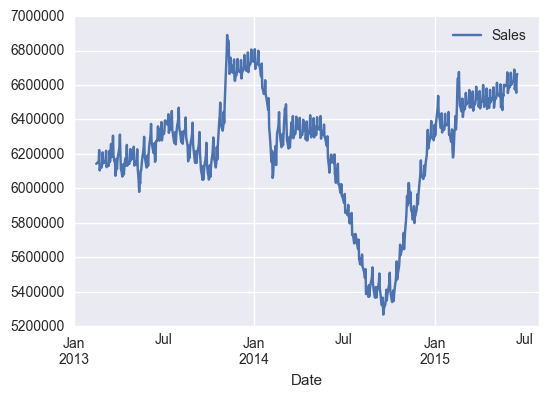

In [34]:
daily_store_sales.rolling(window=90, center=True).mean().plot()

In [37]:
daily_store_sales['Sales'].diff(periods=1).head()

Date
2013-01-01          NaN
2013-01-02    6852594.0
2013-01-03    -602009.0
2013-01-04     291134.0
2013-01-05    -687361.0
Freq: D, Name: Sales, dtype: float64

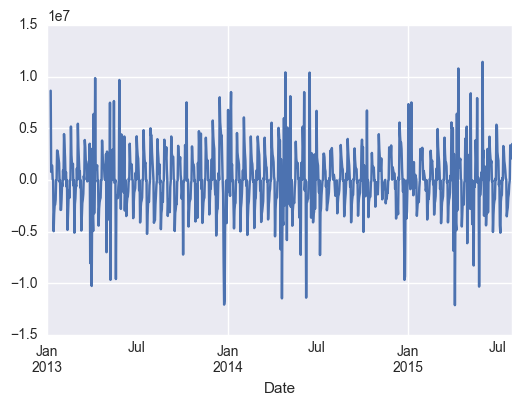

In [42]:
daily_store_sales['Sales'].diff(periods=7).plot()

In [45]:
daily_store_sales.expanding().mean().head()

,Sales
Date,
2013-01-01,9.723500e+04
2013-01-02,3.523532e+06
2013-01-03,4.464961e+06
2013-01-04,5.008460e+06
2013-01-05,5.197086e+06


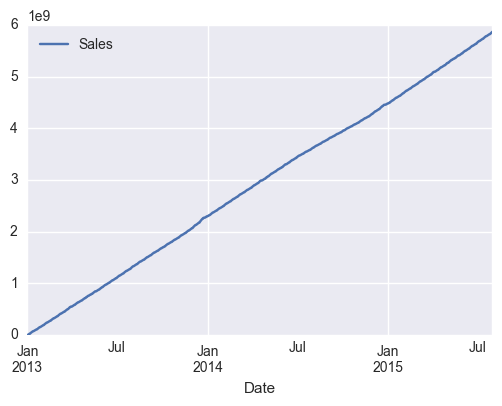

In [46]:
daily_store_sales.expanding().sum().plot()

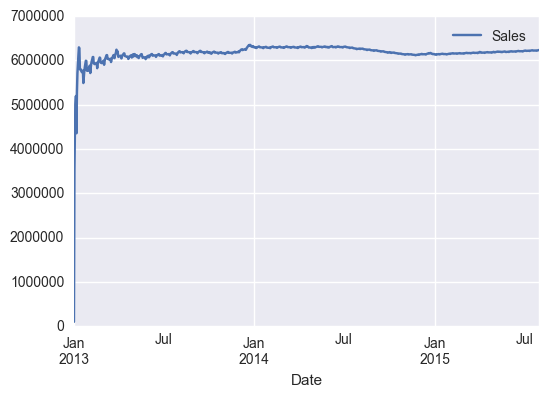

In [52]:
daily_store_sales.expanding().mean().plot()

In [53]:
# computes the average sales, from the first date _until_ the date specified.
daily_store_sales.expanding().mean().head()

,Sales
Date,
2013-01-01,9.723500e+04
2013-01-02,3.523532e+06
2013-01-03,4.464961e+06
2013-01-04,5.008460e+06
2013-01-05,5.197086e+06


In [54]:
data['Sales'].ewm(span=10).mean().head()

Date
2015-07-31    5263.000000
2015-07-31    5703.550000
2015-07-31    6752.933555
2015-07-31    9138.871782
2015-07-31    7899.615302
Name: Sales, dtype: float64

Plot the distribution of sales by month and compare the effect of promotions

In [63]:
sales_by_month_noprom = data.loc[(data.Promo == 0), 'Sales'].resample('M').mean()
sales_by_month_noprom.head()

Date
2013-01-31    4141.538268
2013-02-28    4332.866966
2013-03-31    4115.927186
2013-04-30    4056.571500
2013-05-31    4107.351370
Freq: M, Name: Sales, dtype: float64

In [62]:
sales_by_month_prom = data.loc[(data.Promo == 1), 'Sales'].resample('M').mean()
sales_by_month_prom.head()

Date
2013-01-31    7458.495964
2013-02-28    7585.079372
2013-03-31    7638.399283
2013-04-30    7624.517339
2013-05-31    7104.278786
Freq: M, Name: Sales, dtype: float64

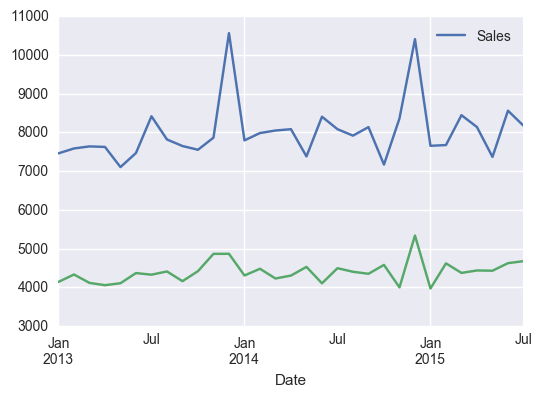

In [65]:
sales_by_month_prom.plot(legend=True)
sales_by_month_noprom.plot()

Are sales more correlated with the prior date, a similar date last year, or a similar date last month?

In [71]:
def autocorrelate(daily_series, number_of_days):
    return daily_series['Sales'].autocorr(lag=number_of_days)

In [72]:
autocorrelate(daily_store_sales, 1)

-0.025245571807191614

In [74]:
autocorrelate(daily_store_sales, 7)

0.55223707546056211

In [73]:
autocorrelate(daily_store_sales, 28)

0.72310245891250213

Plot the 28 day rolling mean of customers in the stores

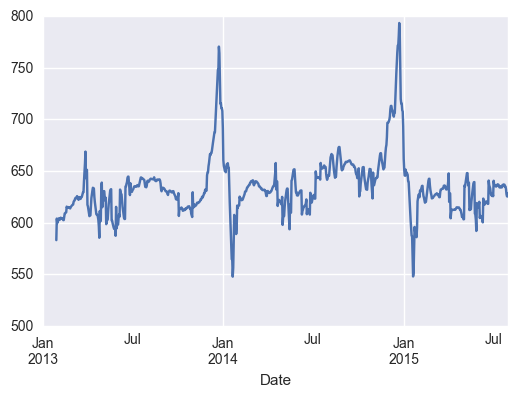

In [76]:
daily_total_customers = data['Customers'].resample('D').mean()
daily_total_customers.rolling(28).mean().plot()